In [1]:
pip install apyori

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('book.csv')
df

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
df.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [4]:
df.value_counts().sum()

2000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
books = []

In [7]:
for i in range(0, 2000):  
  books.append([str(df.values[i,j]) for j in range(0, 11)]) 
books

[['0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0'],
 ['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
 ['1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0'],
 ['0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0'],
 ['1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1'],
 ['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
 ['0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0'],
 ['1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0'],
 ['1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0'],
 ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
 ['0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0'],
 ['1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1'],
 ['1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0'],
 ['1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0'],
 ['1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0'],
 ['0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0'],
 ['0', '0', '1

In [8]:
from apyori import apriori
rules = apriori(books, min_support = 0.20,min_confidence = 0.02,min_lift = 1,min_length=2)
rules=list(rules)

In [9]:
print(len(rules))

3


In [10]:
support=[]
confidence = []
lift = []

In [11]:
for i in range(0,3):       
    support.append(rules[i][1])
    confidence.append(rules[i][2][0][2])
    lift.append(rules[i][2][0][3])

In [12]:
d1=pd.DataFrame(support,columns=['Support'])
d2=pd.DataFrame(confidence,columns=['Confidence'])
d3=pd.DataFrame(lift,columns=['Lift'])

In [13]:
rules = pd.concat([d1,d2,d3],axis=1)
rules

,Support,Confidence,Lift
0,0.9990,0.9990,1.0
1,0.7895,0.7895,1.0
2,0.7885,0.7885,1.0


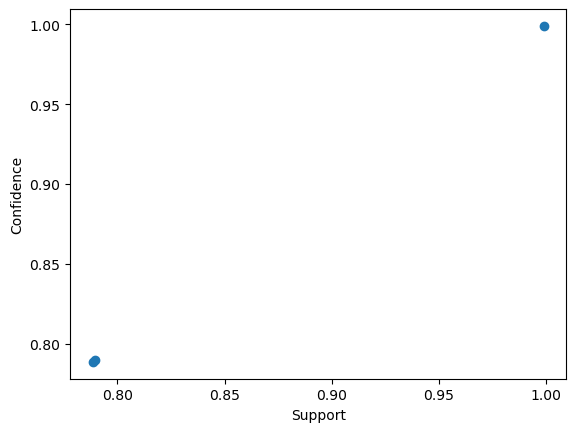

In [14]:
plt.scatter(rules['Support'],rules['Confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

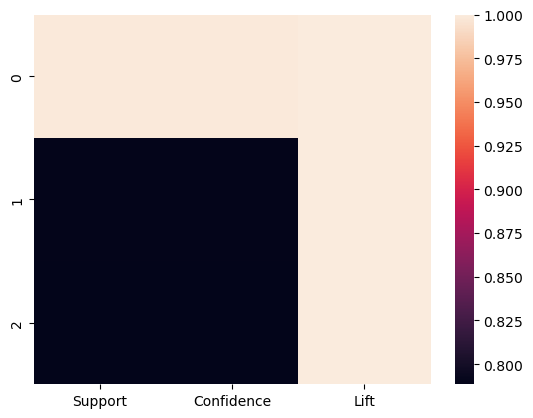

In [15]:
sns.heatmap(data=rules)
plt.show()

In [16]:
rules = apriori(books, min_support =0.9,min_confidence =0.9,min_lift = 1,min_length=3)
rules = list(rules)
print(rules)

[RelationRecord(items=frozenset({'0'}), support=0.999, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0'}), confidence=0.999, lift=1.0)])]


In [17]:
print(len(rules))

1


In [18]:
rules = apriori(books, min_support =0.006,min_confidence =0.0007,min_lift = 1,min_length=4)
rules = list(rules)
print(rules)

[RelationRecord(items=frozenset({'0'}), support=0.999, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0'}), confidence=0.999, lift=1.0)]), RelationRecord(items=frozenset({'1'}), support=0.7895, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'1'}), confidence=0.7895, lift=1.0)]), RelationRecord(items=frozenset({'0', '1'}), support=0.7885, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'0', '1'}), confidence=0.7885, lift=1.0)])]


In [19]:
print(len(rules))

3


In [20]:
support=[]
confidence = []
lift = []

In [21]:
for i in range(0,3):       
    support.append(rules[i][1])
    confidence.append(rules[i][2][0][2])
    lift.append(rules[i][2][0][3])

In [22]:
d11=pd.DataFrame(support,columns=['Support'])
d12=pd.DataFrame(confidence,columns=['Confidence'])
d13=pd.DataFrame(lift,columns=['Lift'])

In [23]:
rules = pd.concat([d11,d12,d13],axis=1)
rules

,Support,Confidence,Lift
0,0.9990,0.9990,1.0
1,0.7895,0.7895,1.0
2,0.7885,0.7885,1.0
